In [ ]:
!pip install kaggle --upgrade

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
!kaggle datasets download ipythonx/rhpe-bone-age

Dataset URL: https://www.kaggle.com/datasets/ipythonx/rhpe-bone-age
License(s): copyright-authors
Original Authors
^C


In [ ]:
!unzip rsna-bone-age.zip

unzip:  cannot find or open rsna-bone-age.zip, rsna-bone-age.zip.zip or rsna-bone-age.zip.ZIP.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ipythonx/rhpe-bone-age")

print("Path to dataset files:", path)

100%|██████████| 13.5G/13.5G [02:12<00:00, 109MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ipythonx/rhpe-bone-age/versions/1


In [ ]:
# prompt:  i wanna to read json file

import json

with open('/content/RSNA_Annotations/RSNA_Annotations/ANATOMICAL_ROIS/anatomical_ROIs_test.json', 'r') as f:
    data = json.load(f)




In [ ]:
annotation = list(data.values())[4]

In [ ]:
annotation

In [ ]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

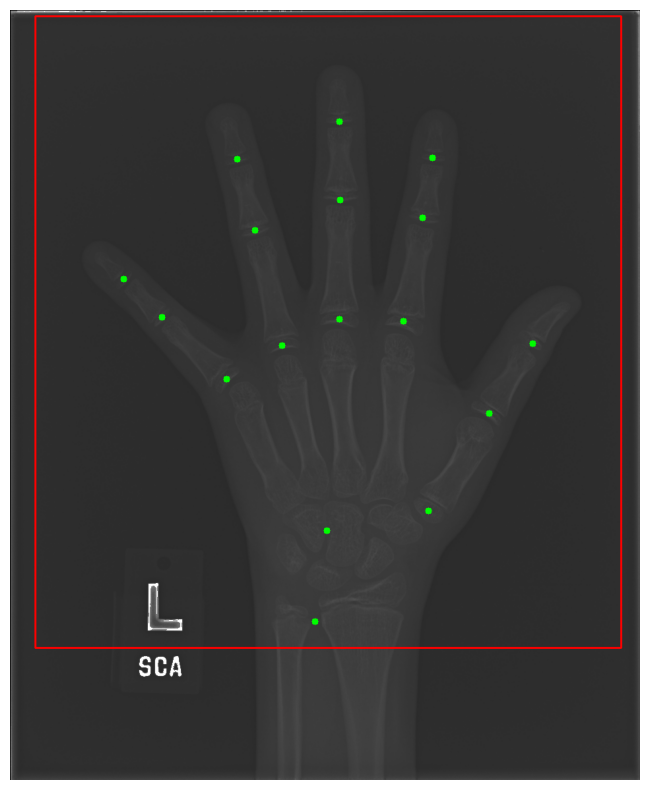

In [ ]:
annotation = {
    'bbox': [38.944, 9.184, 887.332, 959.808],
    'keypoints': [
        172.944, 408.449, 2,
        230.184, 466.216, 2,
        328.592, 560.889, 2,
        344.982, 226.616, 2,
        371.701, 334.364, 2,
        412.8, 509.558, 2,
        499.111, 169.184, 2,
        500.355, 288.2, 2,
        499.07, 469.249, 2,
        640.378, 224.802, 2,
        625.975, 315.987, 2,
        596.928, 472.88, 2,
        792.277, 506.059, 2,
        726.493, 612.454, 2,
        634.85, 760.16, 2,
        480.132, 790.94, 2,
        462.062, 928.992, 2
    ]
}

# 🖼️ تحميل الصورة
image_path = "/content/RSNA_test/images/4375.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # تحويل BGR إلى RGB (لـ Matplotlib)

# 🟥 رسم الـ Bounding Box
x, y, w, h = annotation['bbox']
cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)

# 🔴 رسم النقاط الرئيسية
keypoints = annotation['keypoints']
for i in range(0, len(keypoints), 3):
    x_kp, y_kp, v = keypoints[i], keypoints[i + 1], keypoints[i + 2]
    if v > 0:  # النقطة مرئية
        cv2.circle(image, (int(x_kp), int(y_kp)), 5, (0, 255, 0), -1)

# 📌 عرض الصورة
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()

# prepare Annotation data for YOLOv8

In [ ]:
import pandas as pd
import json

with open('/content/RSNA_Annotations/RSNA_Annotations/ANATOMICAL_ROIS/anatomical_ROIs_train.json', 'r') as f:
    train_data = json.load(f)


In [ ]:
train_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [ ]:
train_data["images"][0]

{'id': 1,
 'file_name': '3146.png',
 'width': 946,
 'height': 1351,
 'date_captured': '2019-03-05 14:56:18.930195',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

In [ ]:
train_data["annotations"][0]

{'id': 1,
 'image_id': 1,
 'category_id': 1,
 'iscrowd': 0,
 'area': 980581.1515919197,
 'bbox': [0, 70.20839306358386, 919.0179728067964, 1066.988003071476],
 'keypoints': [122.57636238222028,
  474.89082080924857,
  2,
  171.3336886860198,
  546.3016568361448,
  2,
  270.94189302909484,
  663.3889017341041,
  2,
  250.69044866501517,
  321.97157989036543,
  2,
  284.3592347921828,
  441.0144795638887,
  2,
  348.0405115803547,
  620.3476380592382,
  2,
  425.2283815028902,
  230.20839306358386,
  2,
  431.1907514450867,
  364.5294414297511,
  2,
  437.24252216510604,
  575.2498345910301,
  2,
  589.1742007785773,
  289.997668451251,
  2,
  575.2791537799772,
  400.85526011560694,
  2,
  546.2228711833657,
  589.7767264362392,
  2,
  773.5943351890166,
  620.7895425763327,
  2,
  691.6350898662048,
  741.2175626559734,
  2,
  579.5751128696259,
  919.0773410404624,
  2,
  418.76418718779024,
  932.0772448979592,
  2,
  430.7713190282192,
  1097.1963961350598,
  2],
 'num_keypoints': 1

In [ ]:
#collect train_data for YOLO train files (B_BOX)
import os

images = train_data["images"]
annotations = train_data["annotations"]
YOLO_train_BBOX = []
YOLO_train_Keypoints = []
trainLoc = "/content/RSNA_train/images/"

for indx,image in enumerate(images):
  image_id = image["id"]
  image_name = image["file_name"]
  h = image["height"]
  w = image["width"]
  annInfo = annotations[indx]
  bbox = annInfo["bbox"]
  # keypoints = annInfo["keypoints"]


  # حساب القيم النسبية BBOX
  x_center = (bbox[0] + bbox[2] / 2) / w
  y_center = (bbox[1] + bbox[3] / 2) / h
  width = bbox[2] / w
  height = bbox[3] / h


  file_path = os.path.join(trainLoc,image_name)
  if not os.path.exists("dataset/images/train"):
    # التأكد من وجود المجلد الجديد، وإنشاؤه إذا لم يكن موجودًا
    os.makedirs("dataset/images/train", exist_ok=True)
    os.makedirs("dataset/labels/train", exist_ok=True)
  os.rename(file_path,os.path.join("dataset/images/train",f"{image_id}.png"))

  with open(os.path.join("dataset/labels/train",f"{image_id}.txt"), "w+") as f:
    f.write(f"0 {x_center} {y_center} {width} {height}")



In [ ]:

with open('/content/RSNA_Annotations/RSNA_Annotations/ANATOMICAL_ROIS/anatomical_ROIs_val.json', 'r') as f:
    val_data = json.load(f)


In [ ]:
#collect val_data for YOLO train files (B_BOX)
import os

images = val_data["images"]
annotations = val_data["annotations"]
YOLO_val_BBOX = []

valLoc = "/content/RSNA_val/images/"

for indx,image in enumerate(images):
  image_id = image["id"]
  image_name = image["file_name"]
  h = image["height"]
  w = image["width"]
  annInfo = annotations[indx]
  bbox = annInfo["bbox"]
  keypoints = annInfo["keypoints"]


  # حساب القيم النسبية BBOX
  x_center = (bbox[0] + bbox[2] / 2) / w
  y_center = (bbox[1] + bbox[3] / 2) / h
  width = bbox[2] / w
  height = bbox[3] / h


  file_path = os.path.join(valLoc,image_name)
  if not os.path.exists("dataset/images/val"):
    # التأكد من وجود المجلد الجديد، وإنشاؤه إذا لم يكن موجودًا
    os.makedirs("dataset/images/val", exist_ok=True)
    os.makedirs("dataset/labels/val", exist_ok=True)
  os.rename(file_path,os.path.join("dataset/images/val",f"{image_id}.png"))

  with open(os.path.join("dataset/labels/val",f"{image_id}.txt"), "w+") as f:
    f.write(f"0 {x_center} {y_center} {width} {height}")



In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 29.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.yaml")  # تحميل YOLO
dataset_path = "/content/dataset/data.yaml"  # مسار ملف الإعدادات

model.train(data=dataset_path, epochs=12, imgsz=640)  # تدريب لاختبار تحميل البيانات

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/dataset/data.yaml, epochs=12, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_de

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 94.2MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/labels/train... 12611 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12611/12611 [01:08<00:00, 184.62it/s]


train: New cache created: /content/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/labels/val... 1425 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1425/1425 [00:07<00:00, 182.87it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 12 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/12      2.14G      1.747      1.645      2.488          4        640: 100%|██████████| 789/789 [08:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:46<00:00,  1.02s/it]

                   all       1425       1425      0.998      0.988      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/12      2.04G     0.8075     0.5499      1.408         12        640: 100%|██████████| 789/789 [08:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:45<00:00,  1.01s/it]

                   all       1425       1425      0.997      0.998      0.995      0.888


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/12      2.03G     0.4305     0.2963      1.093          3        640: 100%|██████████| 789/789 [08:48<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.01it/s]

                   all       1425       1425      0.998      0.998      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/12      2.03G     0.3675     0.2447      1.026          3        640: 100%|██████████| 789/789 [08:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:45<00:00,  1.00s/it]

                   all       1425       1425      0.985      0.987      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/12      2.02G     0.3322     0.2133     0.9869          3        640: 100%|██████████| 789/789 [08:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.01it/s]

                   all       1425       1425      0.999      0.991      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/12      2.04G     0.3062     0.1934       0.97          3        640: 100%|██████████| 789/789 [08:56<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.02it/s]

                   all       1425       1425          1      0.997      0.995      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/12      2.03G     0.2861     0.1797     0.9553          3        640: 100%|██████████| 789/789 [08:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:45<00:00,  1.01s/it]

                   all       1425       1425          1      0.998      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/12      2.03G     0.2697     0.1659      0.943          3        640: 100%|██████████| 789/789 [08:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.01it/s]


                   all       1425       1425      0.999      0.992      0.995       0.97

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/12      2.02G     0.2559     0.1559     0.9301          3        640: 100%|██████████| 789/789 [08:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:45<00:00,  1.00s/it]

                   all       1425       1425          1      0.998      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/12      2.04G     0.2413     0.1471     0.9182          3        640: 100%|██████████| 789/789 [08:45<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:45<00:00,  1.01s/it]

                   all       1425       1425          1      0.999      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/12      2.03G     0.2268     0.1376     0.9084          3        640: 100%|██████████| 789/789 [08:47<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.02it/s]

                   all       1425       1425          1      0.999      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/12      2.03G     0.2171     0.1311     0.9027          3        640: 100%|██████████| 789/789 [08:45<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:44<00:00,  1.02it/s]

                   all       1425       1425          1      0.998      0.995      0.986



12 epochs completed in 1.924 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:43<00:00,  1.03it/s]


                   all       1425       1425          1      0.998      0.995      0.986
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb9bd820ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# حفظ النموذج بعد التدريب
model_path = "yolov8_trained.pt"
model.export(format="torchscript")  # تصدير TorchScript (اختياري)
model.save(model_path)  # حفظ النموذج بتنسيق PyTorch
model.save("/content/drive/MyDrive/Grad/BEAR/YOLOv8/BBOX/yolov8_trained.pt")  # حفظ النموذج بتنسيق PyTorch
print(f"✅ النموذج محفوظ في: {model_path}")

Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.4s, saved as 'runs/detect/train/weights/best.torchscript' (11.9 MB)

Export complete (4.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.torchscript imgsz=640 data=/content/dataset/data.yaml  
Visualize:       https://netron.app
✅ النموذج محفوظ في: yolov8_trained.pt


In [ ]:
results = model.predict(source="/content/RSNA_test/images/", device="cuda", save=True)